# Classical enlighting methods

In [5]:
PYTHON_PATHS = [".."]
import sys
for path in PYTHON_PATHS:
    if path not in sys.path:
        sys.path.append(path)

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

import utils
from ros_bag_processing.enlighting.hist_norm import HistNormModel
from ros_bag_processing.enlighting.gamma import GammaModel
from ros_bag_processing.enlighting.enlighten_gan import EnlightenGanModel


In [6]:
gan_model = EnlightenGanModel()
gamma_2_0_model = GammaModel(gamma=2)
gamma_2_5_model = GammaModel(gamma=2.5)
gamma_3_0_model = GammaModel(gamma=3)
gamma_3_5_model = GammaModel(gamma=3.5)
hist_model = HistNormModel()

In [7]:
dark_image_path = Path("../tests/images/dark_image.jpeg")
dark_image = cv2.cvtColor(cv2.imread(str(dark_image_path)), cv2.COLOR_BGR2RGB)
r_hist, g_hist, b_hist = utils.get_rgb_hists(dark_image)
hist_image = utils.get_rgb_hist_image(r_hist, g_hist, b_hist)


gan_image = gan_model.predict(dark_image)
r_hist, g_hist, b_hist = utils.get_rgb_hists(gan_image)
gan_hist = utils.get_rgb_hist_image(r_hist, g_hist, b_hist)


equalized_gan = hist_model.predict(gan_image)
r_hist, g_hist, b_hist = utils.get_rgb_hists(equalized_gan)
hist_equalized_gan = utils.get_rgb_hist_image(r_hist, g_hist, b_hist)


equalized_image = hist_model.predict(dark_image)
r_hist, g_hist, b_hist = utils.get_rgb_hists(equalized_image)
hist_equalized_image = utils.get_rgb_hist_image(r_hist, g_hist, b_hist)


gamma_corrected_image = gamma_2_0_model.predict(dark_image)
r_hist, g_hist, b_hist = utils.get_rgb_hists(gamma_corrected_image)
hist_gamma_corrected_image = utils.get_rgb_hist_image(r_hist, g_hist, b_hist)

original


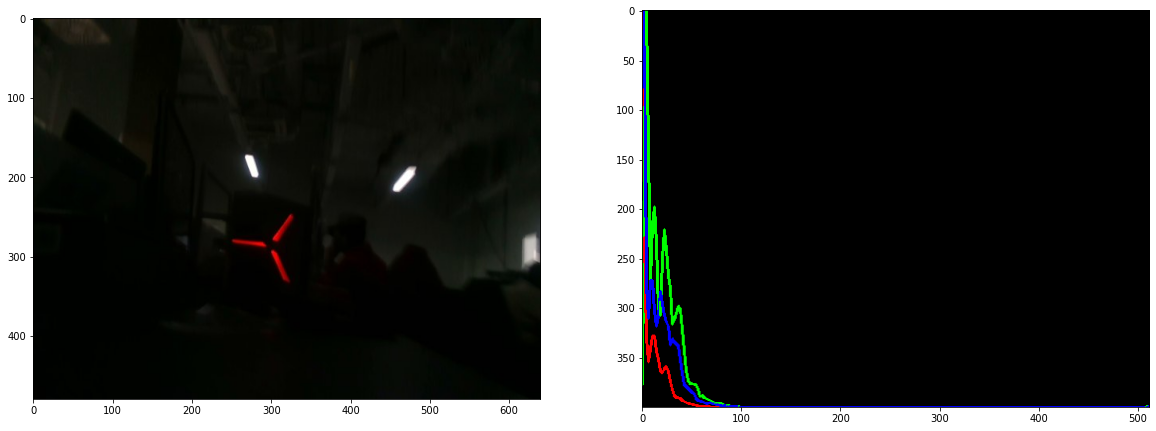

Gan


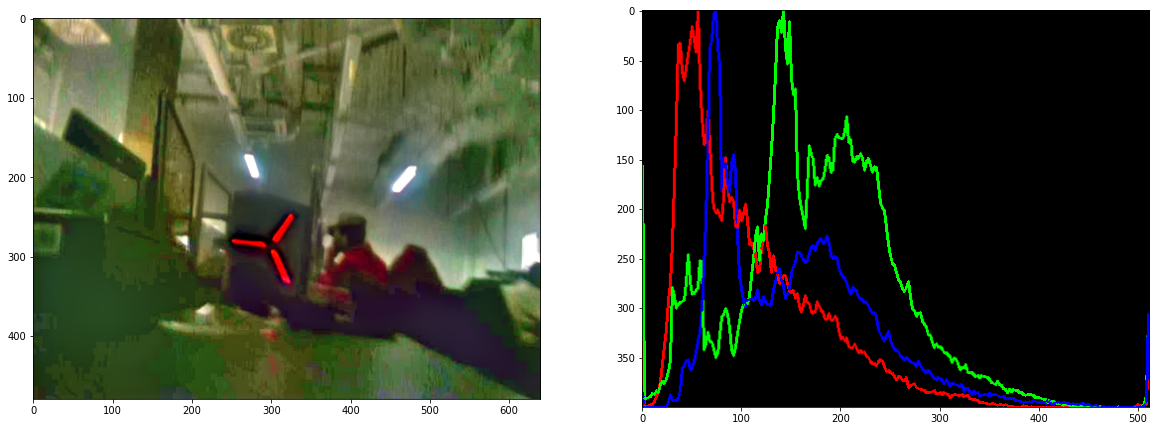

hist equalized gan


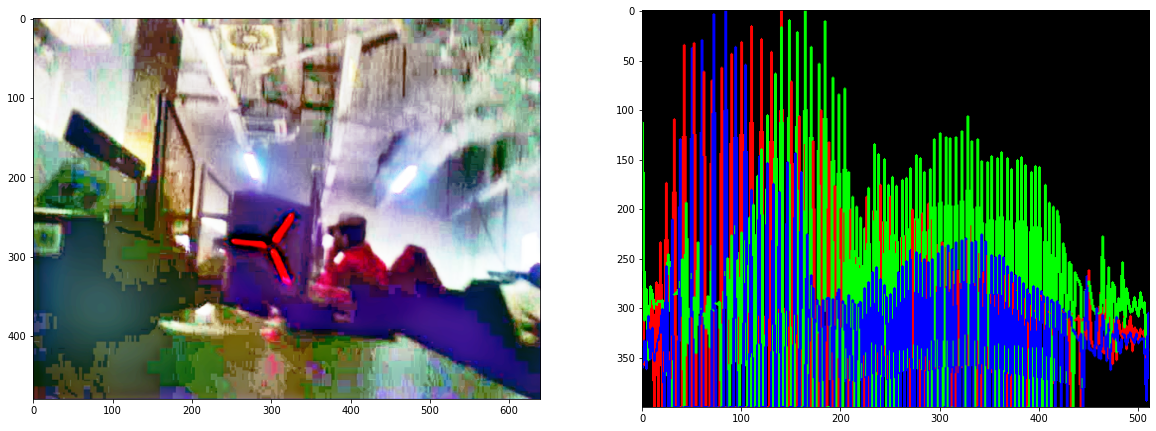

hist equalized original


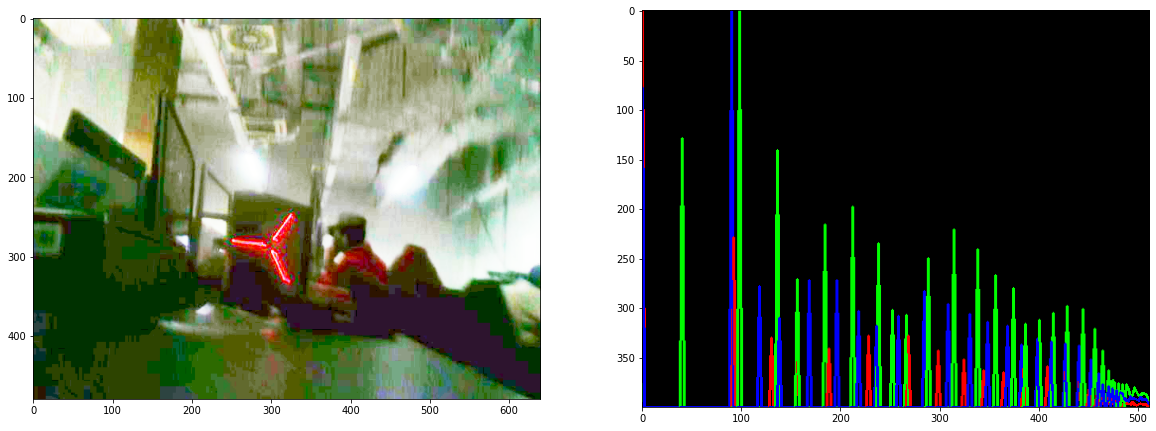

gamma corrected 2.0


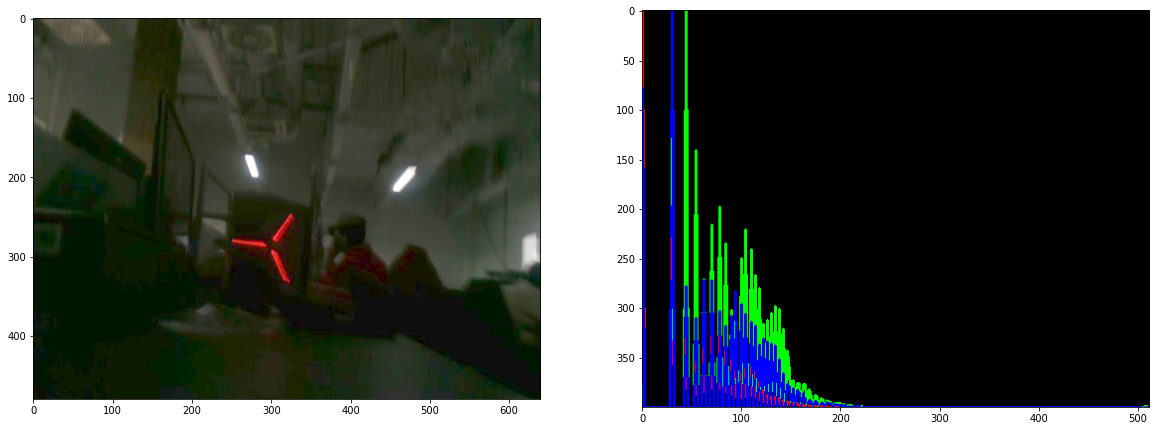

gamma corrected 2.5


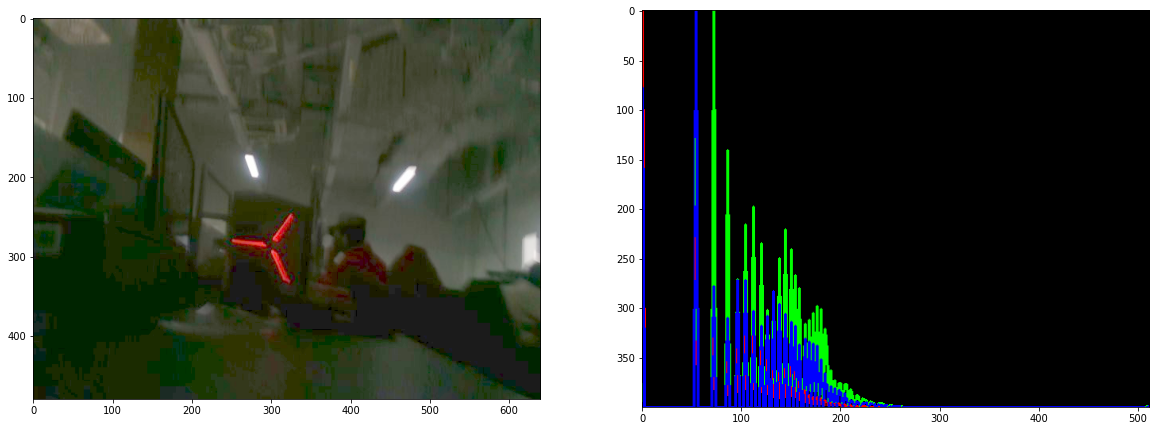

gamma corrected 3.0


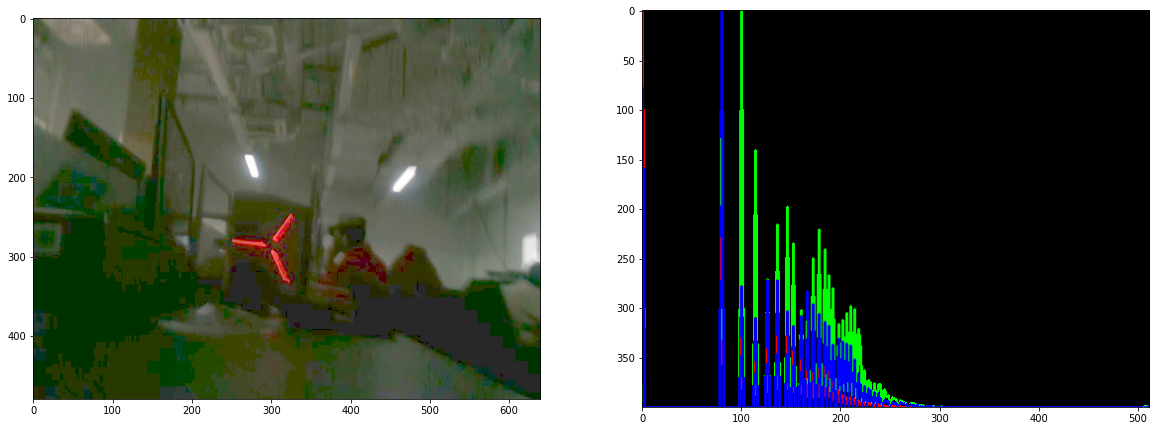

gamma corrected 3.5


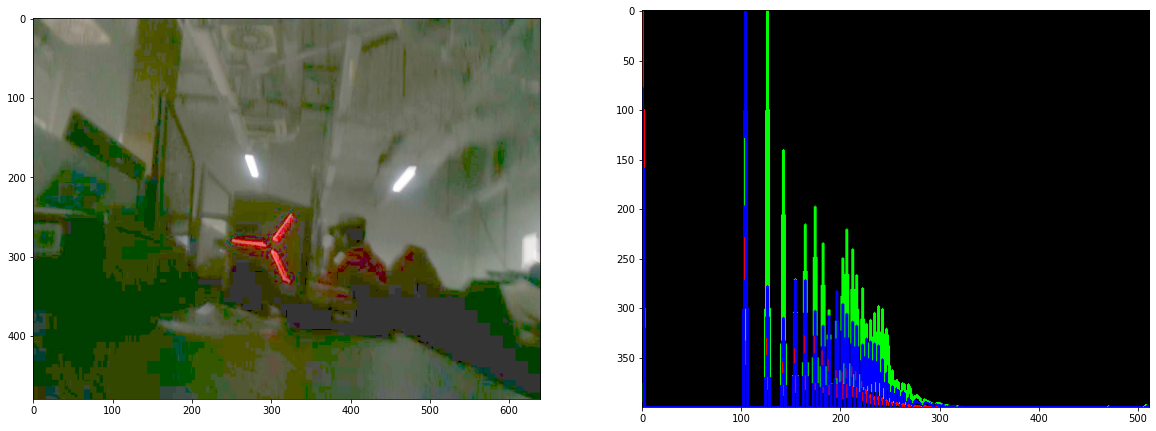

In [8]:
print("original")
utils.plot_2_images(dark_image, hist_image)
print("Gan")
utils.plot_2_images(gan_image, gan_hist)
print("hist equalized gan")
utils.plot_2_images(equalized_gan, hist_equalized_gan)
print("hist equalized original")
utils.plot_2_images(equalized_image, hist_equalized_image)
print("gamma corrected 2.0")
utils.plot_2_images(gamma_corrected_image, hist_gamma_corrected_image)

gamma_corrected_image = gamma_2_5_model.predict(dark_image)
r_hist, g_hist, b_hist = utils.get_rgb_hists(gamma_corrected_image)
hist_gamma_corrected_image = utils.get_rgb_hist_image(r_hist, g_hist, b_hist)
print("gamma corrected 2.5")
utils.plot_2_images(gamma_corrected_image, hist_gamma_corrected_image)

gamma_corrected_image = gamma_3_0_model.predict(dark_image)
r_hist, g_hist, b_hist = utils.get_rgb_hists(gamma_corrected_image)
hist_gamma_corrected_image = utils.get_rgb_hist_image(r_hist, g_hist, b_hist)
print("gamma corrected 3.0")
utils.plot_2_images(gamma_corrected_image, hist_gamma_corrected_image)

gamma_corrected_image = gamma_3_5_model.predict(dark_image)
r_hist, g_hist, b_hist = utils.get_rgb_hists(gamma_corrected_image)
hist_gamma_corrected_image = utils.get_rgb_hist_image(r_hist, g_hist, b_hist)
print("gamma corrected 3.5")
utils.plot_2_images(gamma_corrected_image, hist_gamma_corrected_image)